/tmp/ipykernel_51002/482687107.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(filename)


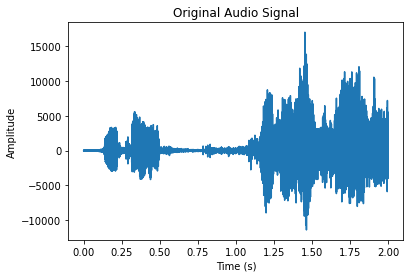

In [1]:
# converting the sample rate of the given audio file from 44.1kHz to 16kHz
import numpy as np
from scipy import signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# read the audio file
filename = "final-speech-audio0.wav"
samplerate, data = wavfile.read(filename)

# plot the original audio signal
time = np.arange(0, len(data)) / samplerate
fig, ax = plt.subplots()
ax.plot(time, data)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Original Audio Signal')
plt.show()

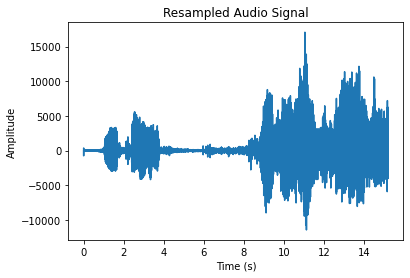

In [2]:
# resample the audio signal
new_samplerate = 16000
time = np.arange(0, len(data)) / samplerate
new_time = np.arange(0, len(data)) / new_samplerate
resampled_data = signal.resample(data, int(new_time[-1] * samplerate))


# plot the resampled audio signal
time = np.arange(0, len(resampled_data)) / new_samplerate
fig, ax = plt.subplots()
ax.plot(time, resampled_data)
ax.set(xlabel='Time (s)', ylabel='Amplitude', title='Resampled Audio Signal')
plt.show()
# save the resampled audio file
new_filename = "final-speech-audio-resampled0.wav"
wavfile.write(new_filename, new_samplerate, resampled_data.astype(np.int16))


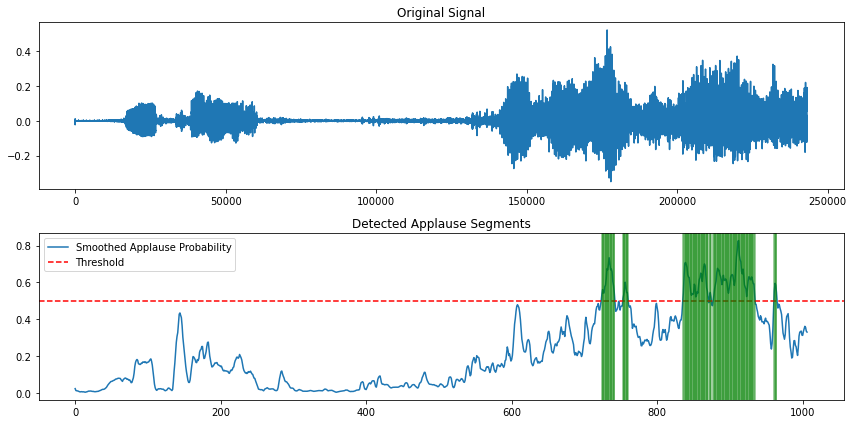

In [3]:
# Import required libraries
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Define a function to calculate the Root Mean Square (RMS) energy of a block
def calculate_rms_energy(block):
    return np.sqrt(np.mean(np.square(block)))

# Define a function to calculate the zero crossing rate of a block
def calculate_zero_crossing_rate(block):
    return np.sum(np.abs(np.diff(np.sign(block)))) / (2 * len(block))

# Define a function to detect applause segments in an audio signal
def detect_applause(audio_signal, sample_rate, window_size, threshold):
    # Calculate block size and shift amount based on window size
    block_size = int(window_size * sample_rate)
    shift_amount = int(block_size // 2)
    # Calculate the number of blocks based on the signal length and block size
    num_blocks = (len(audio_signal) - block_size) // shift_amount + 1
    # Initialize arrays to store RMS energies and zero crossing rates of each block
    rms_energies = np.zeros(num_blocks)
    zero_crossing_rates = np.zeros(num_blocks)

# Loop over all blocks in the signal and calculate RMS energy and zero crossing rate of each block
    for i in range(num_blocks):
        start = i * shift_amount
        end = start + block_size
        block = audio_signal[start:end]

        rms_energies[i] = calculate_rms_energy(block)
        zero_crossing_rates[i] = calculate_zero_crossing_rate(block)

    # Calculate applause probability for each block based on RMS energy and zero crossing rate
    applause_prob = rms_energies * zero_crossing_rates
    applause_prob /= np.max(applause_prob)

    # Smooth the applause probability using a moving average filter
    smoothed_applause_prob = np.convolve(applause_prob, np.ones(5) / 5, mode='valid')

    # Detect applause segments based on the threshold value
    applause_segments = np.where(smoothed_applause_prob > threshold)[0]

    # Return applause probability, smoothed applause probability, detected applause segments and shift amount
    return applause_prob, smoothed_applause_prob, applause_segments, shift_amount
# Load the audio signal from a .wav file
sample_rate, signal_data = wav.read('final-speech-audio-resampled0.wav')

# Convert the signal to a float array between -1 and 1
signal_data = signal_data.astype(np.float32) / 32768.0

# Detect applause segments in the signal using the detect_applause function
window_size = 0.030 # 30ms
threshold = 0.5
applause_prob, smoothed_applause_prob, applause_segments, shift_amount = detect_applause(signal_data, sample_rate, window_size, threshold)

# Plot the original signal and detected applause segments
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal_data)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(smoothed_applause_prob, label='Smoothed Applause Probability')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
for segment in applause_segments:
    plt.axvline(x=segment, color='g', linestyle='-', alpha=0.5)
plt.legend()
plt.title('Detected Applause Segments')
plt.tight_layout()
plt.show()